<a href="https://colab.research.google.com/github/Ashraf-Saleheen/For-Upwork/blob/main/Candle_Stick_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [6]:
pip install mplfinance

In [7]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd


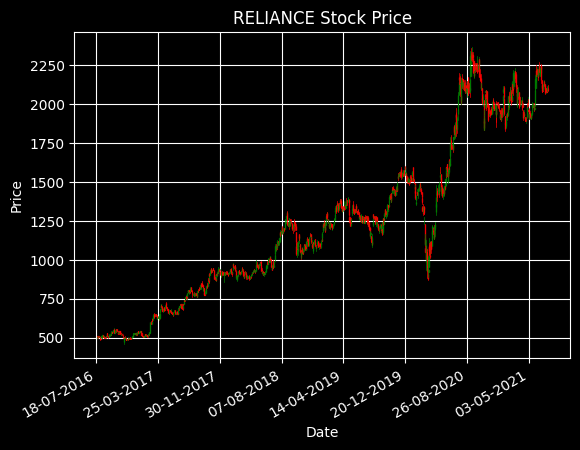

In [9]:
plt.style.use('dark_background')

# Extracting Data for plotting
df = pd.read_csv('/content/RELIANCE.NS_.csv')
df = df[['Date','Open','High','Low','Close']]

# Convert into datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Apply map function
df['Date'] = df['Date'].apply(mdates.date2num)

# Creating Subplots
fig, ax = plt.subplots()

# Plotting the Data
candlestick_ohlc(ax, df.values, width=0.5, colorup='g', colordown='r', alpha=0.8)

# allow grid
ax.grid(True)

# Setting labels

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('RELIANCE Stock Price')

# Formatting Date
date_format = mdates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

plt.show()

# Simple Moving Average

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Importing Data

In [11]:
reliance = pd.read_csv('/content/RELIANCE.NS_.csv',index_col='Date', parse_dates=True)
reliance.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-21,507.192322,507.687622,497.781525,498.450195,485.688568,3097170.0
2016-07-22,498.276825,504.121429,497.831055,502.660278,489.790863,3184126.0
2016-07-25,502.239258,507.068512,498.945496,506.573181,493.603546,3803482.0
2016-07-26,506.697021,512.541626,502.833649,507.217102,494.231049,4853316.0
2016-07-27,506.721771,508.182922,499.737976,501.793488,488.946259,5090697.0


## TO calculate SMA in python we will use dataframe.rolling funciton that helps us to calculate on a rolling window. One the rolling window, we will use.mean() function to calculate the mean of each window.

Syntax: DataFrame.rolling (window,min_periods=None,center=False,win_type=None,on=None,axis=0).mean()

Parameters:

Window: Size of the window. That is how many observations we have to take for the calculation of each window.

min_periods: Least number of observations in a window required to have a value (otherwise result is NA).

center: It is used to set the labels at he center of the window.

win_type: It is used to set the window type.

on: Datetime column of our dataframe on which we have to calculate rolling mean.

axis: integer or string, default 0



In [12]:
 # unpdating our dataframe to have only one column 'Close' as rest all columns are of no use for us at the moment using .to_frame() to convert pandas series into dataframe.
 reliance = reliance['Close'].to_frame()

 # Calculating simpe moving average using .rolling(window).mean(), with widow size = 30
 reliance['SMA30'] = reliance['Close'].rolling(window=30).mean()

# Removing all the Null values using dropna() method

reliance.dropna(inplace=True)

reliance.head()

,Close,SMA30
Date,,
2016-09-01,509.767914,505.689072
2016-09-02,501.917328,505.804643
2016-09-06,505.161560,505.888019
2016-09-07,504.047150,505.803818
2016-09-08,511.848175,505.958187


# Plotting Simple Moving Average

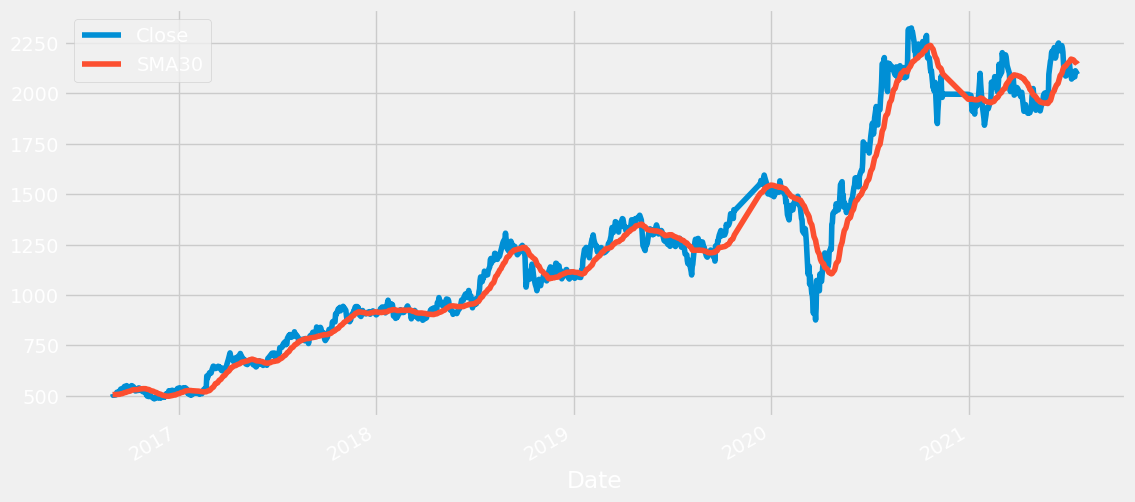

In [13]:
# plotting close price and simple moving average of 30 days using .plot() method
reliance[['Close','SMA30']].plot(label="Reliance Stock Price", figsize=(12.2,6))
plt.legend(loc='upper left')
plt.show()

# EMA (Exponential Moving Average)

### Calculating Exponential Moving Average

#### To calculate EMA in python we use dataframe.ewm()function. It provides us exponentially weighted functions. We will be using .mean()function to calculate EMA.

##### Syntax: DataFrame.ewm(com=None,span=None,halflife=None,alpha=None,min_periods=0,adjust=True,ignore_na=False,axis=0,times=None.mean()

Parameters:

com: float,optional.It is the decay in terms of span.
halflife: float,str,timedelta,optional. it is the decay interms of halflife.

alpha: float,optional. It is the smoothing factor having value between 0 and 1 and 1 inclusive.

min_periods: int,default 0. Least number of observations in a window required to have a value (otherwise result is NA).

adjeust : bool,default True. Divide by decaying adjustment factor in begining periods to account for imbalance in relative weightings(viewing EWMA as a moving average).

ignore_na: Ignore missing values when calculating weights; specify True to reproduce pre 0.15.0 behavior.

axis: The axis to use. The value 0 identifies the rows, and 1 identifies the columns.





In [14]:
# updating our dataframe to have only one column 'Close' as rest all columns
# are of no use for us at the moment using .to_frame() to convert pandas series
# into dataframe.

reliance = reliance['Close'].to_frame()

# Calculating Exponential Moving Average using .ewm(span).mean(), with window size = 30
reliance['EWMA30'] = reliance['Close'].ewm(span=30).mean()

# Removing all the Null values using dropna() method

reliance.dropna(inplace=True)

reliance.head()

,Close,EWMA30
Date,,
2016-09-01,509.767914,509.767914
2016-09-02,501.917328,505.711778
2016-09-06,505.161560,505.516014
2016-09-07,504.047150,505.111288
2016-09-08,511.848175,506.644093


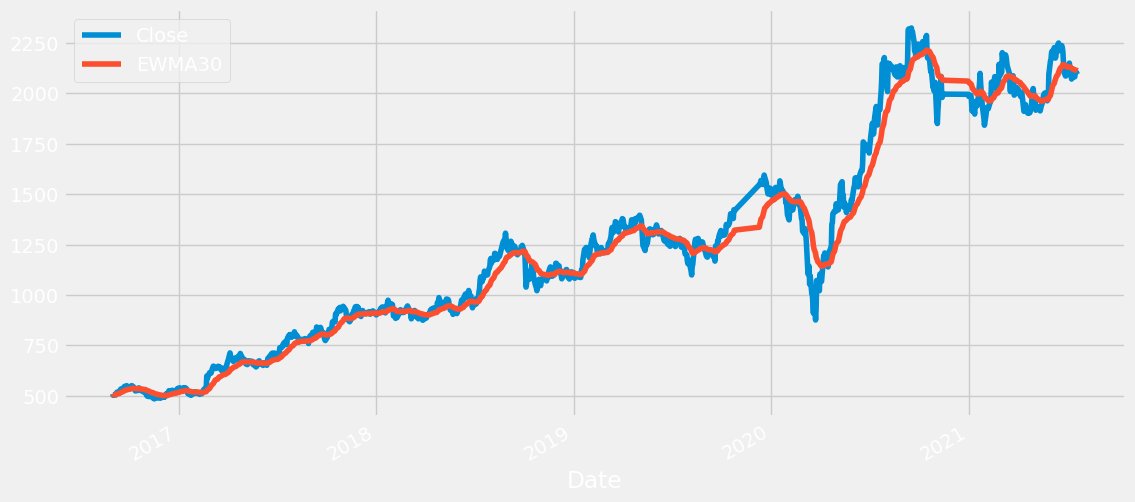

In [15]:
# plotting Close price and exponential moving averages of 30 days using .plot()method
reliance[['Close','EWMA30']].plot(label="Reliance Stock Price", figsize=(12.2,6))
plt.legend(loc='upper left')
plt.show()